## Voting-Reggressor Algorithm

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
dataset=pd.read_csv("age_experience_salary_data.csv")

In [138]:
dataset.columns

Index(['Age', 'Experience', 'Salary'], dtype='object')

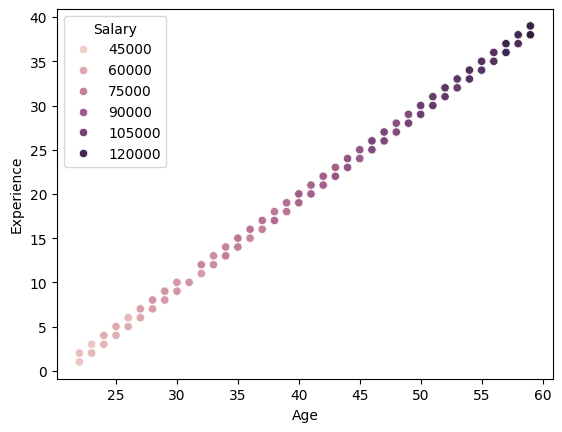

In [139]:
sns.scatterplot(x="Age",y="Experience",hue="Salary",data=dataset)
plt.show()

In [140]:
x=dataset.iloc[:,:-1]
y=dataset["Salary"]

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [144]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(98.3501561001573, 98.61880083393868)

In [145]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(99.70770386970298, 96.80410988779923)

In [146]:
sv=SVR()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(-3.7668783854843735, 0.029166721874340773)

In [147]:
from sklearn.ensemble import VotingRegressor

In [148]:
prd=[("lr",LinearRegression()),("dt",DecisionTreeRegressor()), ("sv",SVR())  ]

In [206]:
vr=VotingRegressor(estimators=prd,weights=[14,13,1])

In [207]:
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor()), ('sv', SVR())],
                weights=[14, 13, 1])

In [208]:
vr.score(x_train,y_train)*100,vr.score(x_test,y_test)*100

(99.1878442364984, 98.12938326672092)